# The Ford GoBike System Data
## John Magdy

## Preliminary Wrangling

>
The Ford GoBike Dataset being used is the 2018 data seperated for each month of the year it inclued information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. by grouping each dataset to get the entirety of 2018 data and do the required exploratory and explanatory analysis on it.

In [3]:
#libraries
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [38]:
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
#reading the dataset for the first month of january 2018 from the data source
test = pd.read_csv('https://s3.amazonaws.com/fordgobike-data/201801-fordgobike-tripdata.csv.zip')
test.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In here we find a sample of the datasets that contains the month of january

In [5]:
#reading all the months and assigning them to variables
for months in range (1,13):
    url = 'https://s3.amazonaws.com/fordgobike-data/2018'+ str(months).zfill(2) +'-fordgobike-tripdata.csv.zip'
    print(url)
    globals()["df" + str(months)] = pd.read_csv(url)

https://s3.amazonaws.com/fordgobike-data/201801-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201802-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201803-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201804-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201805-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201806-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201807-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201808-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201809-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201810-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201811-fordgobike-tripdata.csv.zip
https://s3.amazonaws.com/fordgobike-data/201812-fordgobike-tripdata.csv.zip


creating a for loop to read all the datasets automatically and storing the variables in a list

In [6]:
#structure of the datasets
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(94802, 16)
(106718, 16)
(111382, 16)
(131169, 16)


datasets should have the same columns so merging and adding them together in one big dataset is the next step

In [7]:
#merging all data
df_all= pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12])

In [8]:
df_all

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131358,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982.0,Female,No
131359,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999.0,Female,No
131360,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991.0,Male,No
131361,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,1963.0,Male,No


In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 241.7+ MB


In [10]:
df_all.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [11]:
#dropping all null values
df_all.dropna(axis=0, inplace= True)

In [12]:
df_all.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [13]:
#converting types to datetimne
df_all.start_time = pd.to_datetime(df_all.start_time)
df_all.end_time = pd.to_datetime(df_all.end_time)

In [14]:
#adding member age column
df_all['member_age'] = 2018-df_all['member_birth_year']

In [15]:
df_all['duration_min'] = df_all['duration_sec'] / 60

In [16]:
df_all

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,32.0,1254.733333
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,22.0,1192.933333
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,27.0,666.100000
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134.0,Valencia St at 24th St,37.752428,-122.420628,3571,Subscriber,1988.0,Male,No,30.0,7.550000
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,1403,Subscriber,1980.0,Male,No,38.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131357,1137,2018-12-01 00:01:49.693,2018-12-01 00:20:47.519,73.0,Pierce St at Haight St,37.771793,-122.433708,50.0,2nd St at Townsend St,37.780526,-122.390288,273,Subscriber,1990.0,Male,No,28.0,18.950000
131358,473,2018-12-01 00:11:54.811,2018-12-01 00:19:48.547,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,1982.0,Female,No,36.0,7.883333
131359,841,2018-12-01 00:02:48.726,2018-12-01 00:16:49.766,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,1999.0,Female,No,19.0,14.016667
131360,260,2018-12-01 00:05:27.615,2018-12-01 00:09:47.956,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,1991.0,Male,No,27.0,4.333333


In [17]:
df_all.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age,duration_min
count,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06
mean,7.728624e+02,1.204426e+02,3.776877e+01,-1.223511e+02,1.189243e+02,3.776887e+01,-1.223506e+02,2.292758e+03,1.983061e+03,3.493921e+01,1.288104e+01
std,1.943048e+03,1.001721e+02,1.015663e-01,1.193663e-01,1.001915e+02,1.014133e-01,1.187729e-01,1.287598e+03,1.045133e+01,1.045133e+01,3.238413e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03,1.800000e+01,1.016667e+00
25%,3.440000e+02,3.600000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.221000e+03,1.978000e+03,2.700000e+01,5.733333e+00
50%,5.430000e+02,8.900000e+01,3.778107e+01,-1.223971e+02,8.900000e+01,3.778127e+01,-1.223959e+02,2.333000e+03,1.985000e+03,3.300000e+01,9.050000e+00
75%,8.390000e+02,1.870000e+02,3.779728e+01,-1.222876e+02,1.860000e+02,3.779728e+01,-1.222894e+02,3.327000e+03,1.991000e+03,4.000000e+01,1.398333e+01
max,8.628100e+04,3.810000e+02,3.788022e+01,-1.218333e+02,3.810000e+02,3.788022e+01,-1.218333e+02,6.234000e+03,2.000000e+03,1.370000e+02,1.438017e+03


### What is the structure of your dataset?

> There are 1,863,721 data entry for the whole year of 2018 that describes the bike rental scene in the San Francisco Bay area of California with columns (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip, member_age)  
 
### What is/are the main feature(s) of interest in your dataset?

> age, duration, user type, and gender from the dataset

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the age and user type might be a big factor as it will show what catagory of people are more likely to ride bikes along side which places do people prefer to ride thier bikes the most at by knowing the duration.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

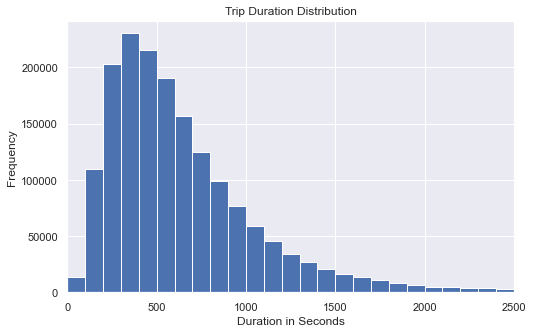

In [34]:
bins = np.arange(0, df_all['duration_sec'].max() + 100 , 100)
plt.figure(figsize=[8, 5])
plt.hist(data = df_all , x = 'duration_sec' , bins = bins)
plt.xlim(0,2500)
plt.title('Trip Duration Distribution')
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency');

the duration time distribution is left tailed and mostly centered on values which are less than 2000 seconds with peak around 400 seconds. Number of Trips values first increases starting from around 8000  to 12500 trips at around 400 seconds but then starts to fall below at 2000 trips under 2000 seconds.

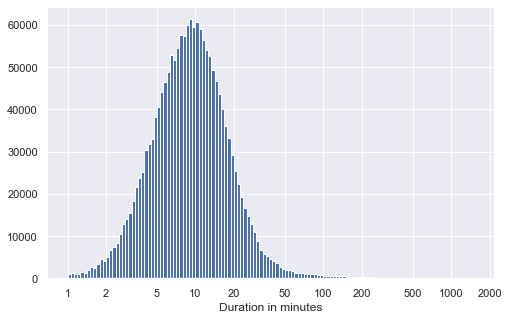

In [35]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_all['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_all, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000])
plt.xlabel('Duration in minutes');

a noraml distrubution for the duration of trips in minutes by applying logarithmic transformation to x-axis

In [20]:
#using the start time to seperate and get the hour,day,week,month of each bike rental
df_all['start_date'] = df_all.start_time.dt.strftime('%Y-%m-%d')
df_all['start_month'] = df_all.start_time.dt.strftime('%B')
df_all['start_week'] = df_all.start_time.dt.strftime('%A')
df_all['start_day'] = df_all.start_time.dt.strftime('%H')

In [21]:
df_all.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,duration_min,start_date,start_month,start_week,start_day
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.76142,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,32.0,1254.733333,2018-01-31,January,Wednesday,22


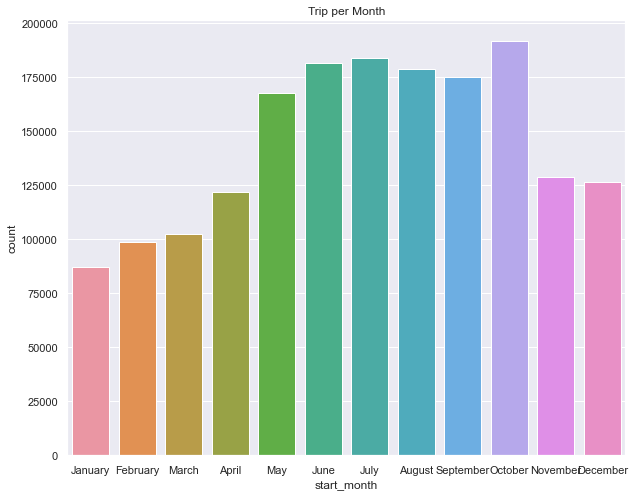

In [22]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(data = df_all, x = 'start_month').set(title='Trip per Month');

October is the busiest month

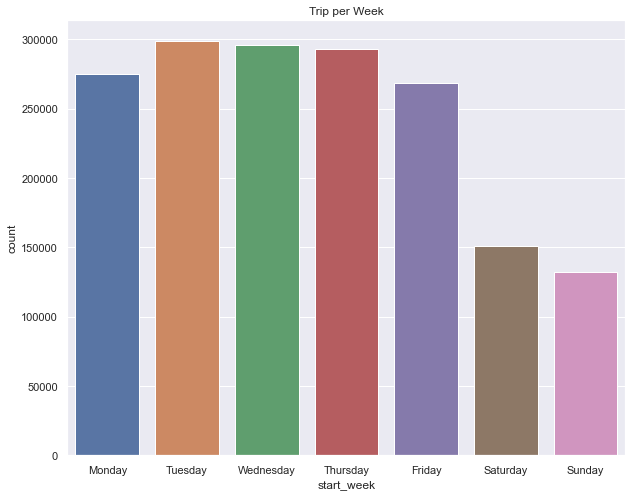

In [39]:
#rearrange days order
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_all["start_week"] = pd.Categorical(df_all.start_week, categories=days, ordered=True)

sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(data = df_all, x = 'start_week').set(title='Trip per Week');

Tuesday is the buseist day

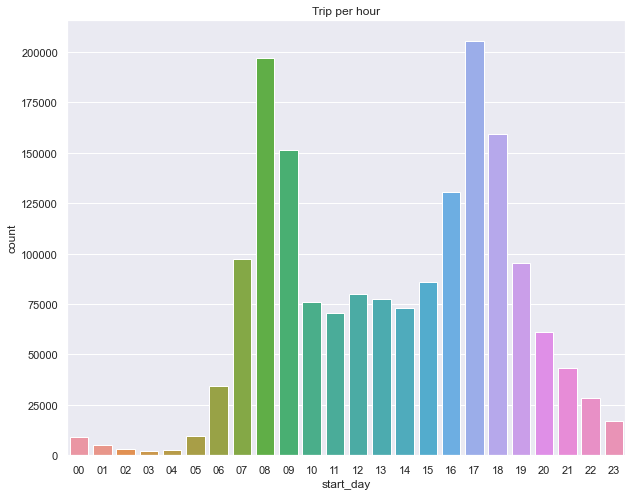

In [41]:
days = ["00", "01", "02", "03","04","05", "06","07","08","09","10","11","12","13","14","15","16","17","18","19","20","21","22","23"]
df_all["start_day"] = pd.Categorical(df_all.start_day, categories=days, ordered=True)

sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(data = df_all, x = 'start_day').set(title='Trip per hour');

8 pm is the busiest time

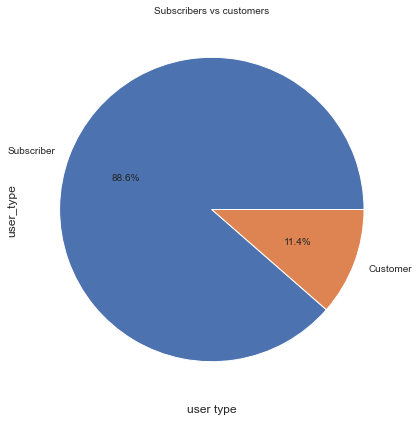

In [25]:
df_all.user_type.value_counts().plot(kind='pie', figsize=(8,7),fontsize =10, autopct='%1.1f%%')

ax = plt.gca()
ax.set_xlabel('user type')
ax.set_title("Subscribers vs customers", fontsize=10);



The percentage of users that are subscribers vs regular customers

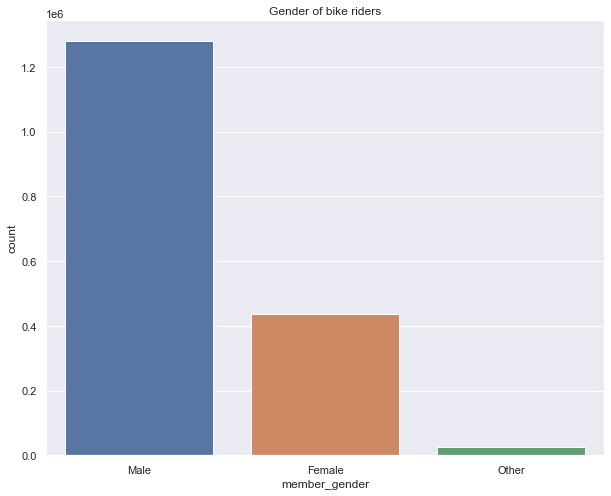

In [26]:
sns.countplot(data=df_all,x='member_gender').set(title='Gender of bike riders');

Males bike riders are triple that of female bike riders.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distrubution of the bike trip duration was left tailed so we needed to apply a logarithmic transformation to x-axis

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> for a more clealer understanding the duration was changed from seconds to minutes, then we seprated each month, day, and hour for analysis usage.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

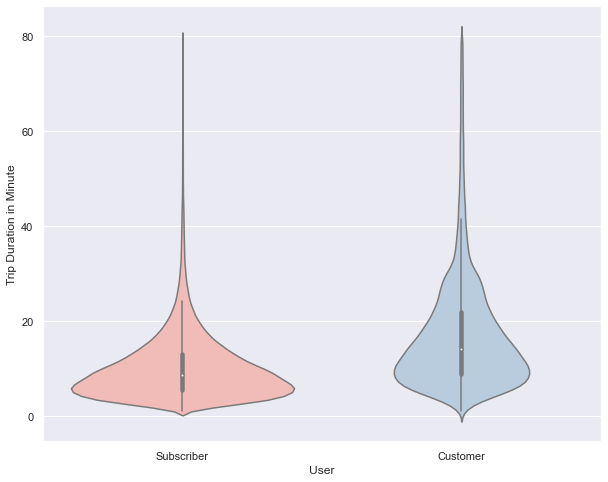

In [27]:
sns.set(style="darkgrid")
sns.violinplot(data=df_all[df_all.duration_min <80], x='user_type', y='duration_min', palette="Pastel1");
plt.xlabel('User');
plt.ylabel('Trip Duration in Minute');

customer trip duration tend to be more narrower than the average subscriber

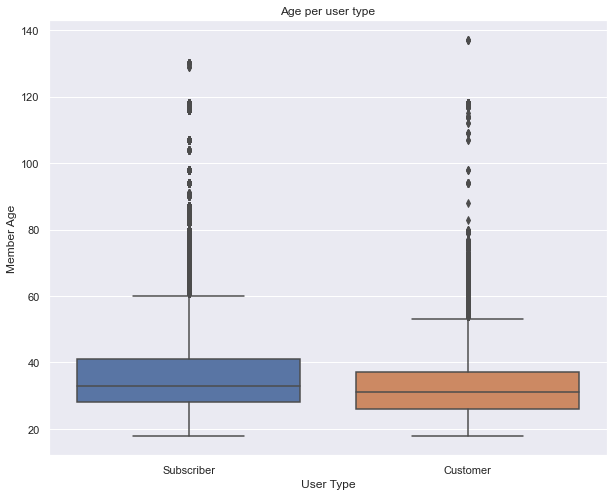

In [28]:
sns.set(style="darkgrid")
sns.boxplot(data=df_all, x='user_type', y='member_age').set(title='Age per user type')
plt.xlabel('User Type')
plt.ylabel('Member Age');

Subscribers tend to be more older than the average customer

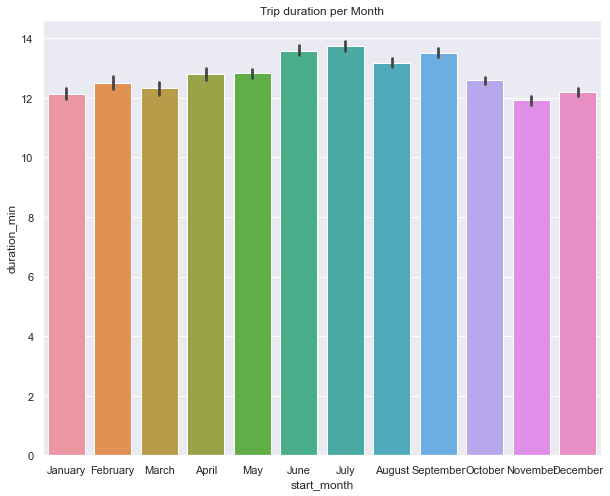

In [29]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(data = df_all, x = 'start_month',y='duration_min').set(title='Trip duration per Month');

month of july tend to have the highest trip duration 

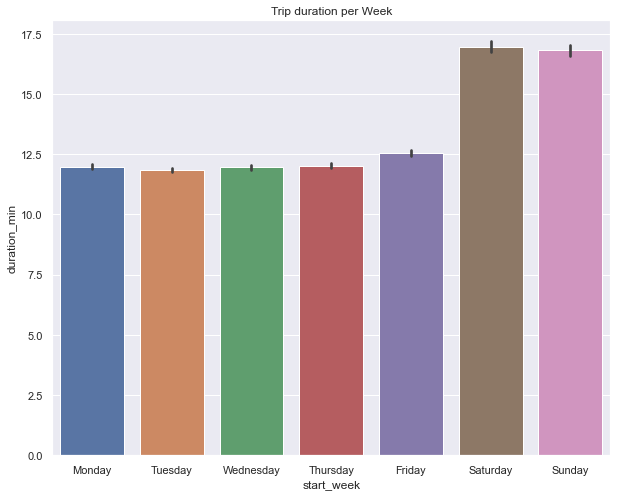

In [40]:
sns.set(rc={'figure.figsize':(10,8)})
sns.barplot(data = df_all, x = 'start_week',y='duration_min').set(title='Trip duration per Week');

the weekend on Sunday and saturday tend to have the highest duration of ride time

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> it was noticed that customers tend to ride thier bikes more compared to subscribers which was assumed the oppisite by logic witout looking at any data. the most common days to ride a bike is on weekends, saturdays and sundays. with the most highest months during the summer.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> the duration of ride and number of rides for each day doesnt correspond. the average subscriber is older than the average customer and takes less time in thier bike ride

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

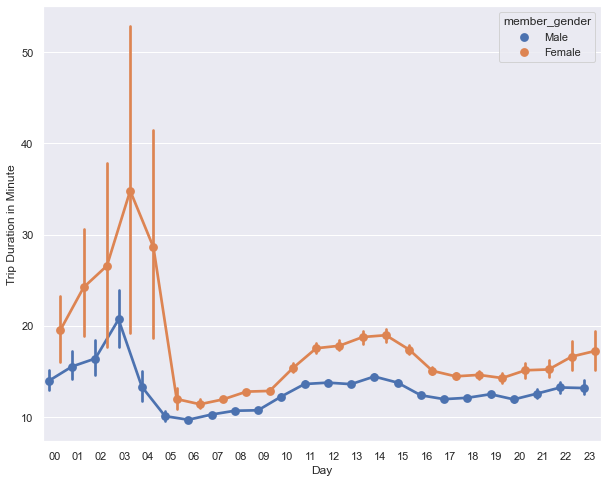

In [42]:
df_all= df_all[df_all.member_gender != 'Other']
sns.pointplot(data=df_all, x='start_day', y='duration_min', hue='member_gender', height=4.5,dodge=0.5)
plt.xlabel('Day')

plt.ylabel('Trip Duration in Minute');

Text(0.5, 0.98, 'Male and Female Trip Duration during weekdays')

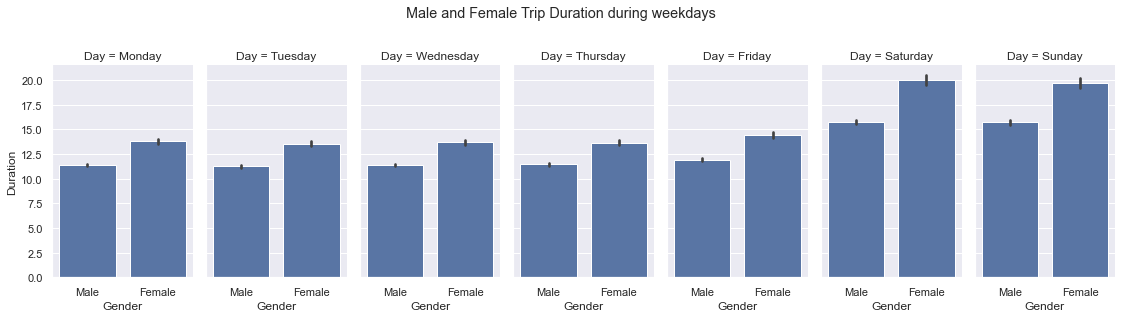

In [54]:
df_all.rename(columns = {'start_week':'Day'}, inplace = True)
df_all.rename(columns = {'duration_min':'Duration'}, inplace = True)
df_all.rename(columns = {'member_gender':'Gender'}, inplace = True)
g = sns.FacetGrid(df_all, col="Day", height=4.5, aspect=.5)
g.map(sns.barplot, "Gender", "Duration", order=["Male", "Female"]);
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Male and Female Trip Duration during weekdays')

Females have a much higher trip duration on average when compared to males on each day of the week and hour especially on weekends. we can also see that sunday and saturday has much trip time duration as mentioned in the bivariate exploration part.

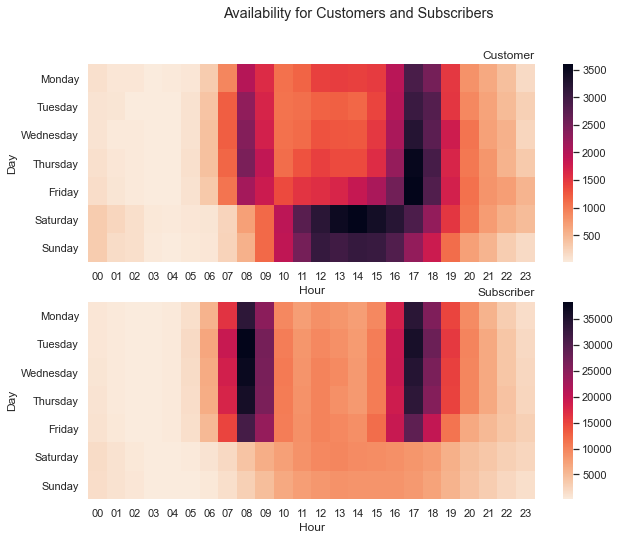

In [57]:
#master plot
plt.suptitle('Availability for Customers and Subscribers')
#first heatmap
plt.subplot(2, 1, 1)
customer = df_all.query('user_type == "Customer"')
first_counts = customer.groupby(['Day', 'start_day']).size()
first_counts = first_counts.reset_index(name='count')
first_counts = first_counts.pivot(index='Day', columns='start_day', values='count')
sns.heatmap(first_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour');
plt.ylabel('Day');
#second heatmapb
plt.subplot(2, 1, 2)
subscribers = df_all.query('user_type == "Subscriber"')
second_counts = subscribers.groupby(['Day', 'start_day']).size()
second_counts = second_counts.reset_index(name='count')
second_counts = second_counts.pivot(index='Day', columns='start_day', values='count')
sns.heatmap(second_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour');
plt.ylabel('Day');



For the customer vs subscriber activity per hour in each day of the week there is quite a noticable difference in both user types patterns. most noticable in the days is that subscribers are way less active during weekends while customers are most active in the weekends.the active hours during the normal days are usually in the early morning or between 4 pm to 7 pm while in weekends its during the mid day.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the first two plots showed how females tend to spend more time on thier bike rides in contrast to males by comparing the bike ride duration of each hour of the day and each day as a whole when it comes to both genders.

### Were there any interesting or surprising interactions between features?

> the biggest surprise was seeing how subscribers uses thier bikes during the normal weekdays while customers use it during the weekend mostly. it also reflects how subscribers tend to be more older than the regular customer as shown in the bivariate part which explains why younger poeple might prefer to ride thier bikes during weekends for the most part. 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!